# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [3]:
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso16_aprendendo_classificar_dados_machine_learning\\marketing_investimento.csv')

In [4]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


### Análise exporatória de dados

In [6]:
import plotly.express as px

Primeiro vamos visualizar os gráficos das variáveis categóricas

In [8]:
px.histogram(dados, x='aderencia_investimento', text_auto = True)

In [9]:
px.histogram(dados, x='estado_civil', text_auto = True, color='aderencia_investimento', barmode = 'group')

In [10]:
px.histogram(dados, x='escolaridade', text_auto = True, color='aderencia_investimento', barmode = 'group')

In [11]:
px.histogram(dados, x='inadimplencia', text_auto = True, color='aderencia_investimento', barmode = 'group')

In [12]:
px.histogram(dados, x='fez_emprestimo', text_auto = True, color='aderencia_investimento', barmode = 'group')

Variáveis Numéricas

In [13]:
px.box(dados, x='idade', color='aderencia_investimento')

In [14]:
px.box(dados, x='saldo', color='aderencia_investimento')

In [15]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

In [16]:
px.box(dados, x='numero_contatos', color='aderencia_investimento')

### Módulo 2 - Transformação de dados - aula 2 - Separação de variáveis

In [17]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


Fazer a separação dos dados em variáveis explicativas (x) e variáveis resposta / alvo (y):

In [18]:
x = dados.drop('aderencia_investimento', axis=1)
y = dados['aderencia_investimento']

In [19]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [20]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

### Módulo 2 - Transformação de dados - Aula 4 - Transformando variáveis explicativas

Os algoritmos de Machine Learning não conseguem compreender informações que não estejam em formato numérico. Portanto, se for o desejo de utilizar variáveis categóricas em modelos, é necessário que elas passem por algum tipo de tratamento para que fiquem em formato numérico. Isso não quer dizer que vão se tornar variáveis numéricas, apenas que estarão em um formato que seja compreendido pelos modelos.

Essa transformação deverá ser feita através do One-Hot Encoding.

O One-Hot Encoding funciona recolhendo as características de cada uma das colunas categóricas.

Para que o modelo compreenda essas características como valor numérico e de forma diferente, podemos criar uma coluna para cada uma dessas características. Nessas colunas, iremos atribuir o valor 1 quando houver a presença da característica, e 0 quando ela estiver ausente.

Dessa forma, conseguimos transformar as variáveis categóricas em variáveis numéricas sem perder as informações originais dos dados.

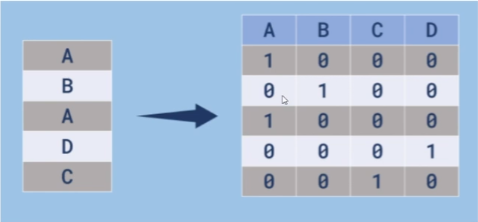

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
colunas = x.columns

In [23]:
one_hot = make_column_transformer((
    OneHotEncoder(drop ='if_binary'), 
     ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder='passthrough',
    sparse_threshold=0)

In [24]:
x = one_hot.fit_transform(x)

In [25]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [26]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


### Módulo 2 - Transformação de dados - Aula 6 - Transformando a variável alvo

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder = LabelEncoder()

In [29]:
y = label_encoder.fit_transform(y)

In [30]:
y

array([1, 1, 0, ..., 1, 1, 1], shape=(1268,))

### Módulo 3 - Ajustando modelos - Aula 2 - Divisão de treino e teste

Uma tarefa muito importante para a avaliação de modelos de machine learning é a divisão dos dados entre treinamento e teste. O conjunto de treinamento é utilizado para que o modelo compreenda padrões e relações nos dados para que ele possa criar uma regra para fazer predições. O conjunto de teste, por sua vez, é reservado para avaliar o desempenho do modelo em dados que não foram utilizados no treinamento, simulando a capacidade do modelo de generalizar para novos dados.

In [31]:
from sklearn.model_selection import train_test_split

Para mantermos essa proporção de dados, tanto nos dados de treinamento quanto nos de teste, utilizamos o parâmetro stratify, que será igual a y.

Por fim, a separação dos dados é feita de forma totalmente aleatória, sendo 75% dos dados para o conjunto de treinamento e 25% para o teste. Esse método mantém uma proporção maior para os dados de treinamento, para que o algoritmo consiga compreender melhor o padrão dos dados com mais dados.

In [32]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state = 5)

### Módulo 3 - Ajustando modelos - Aula 4 - Modelo de base

Para iniciarmos o nosso processo de modelagem, vamos começar com o modelo mais simples possível, chamado dummy classifier. Esse algoritmo classifica todos os registros da base de dados com base na categoria da variável alvo de maior frequência, ou seja, a que tem uma contagem maior na nossa base de dados.

Se um modelo mais complexo não apresenta um desempenho melhor que o modelo base (dummy classifier), que simplesmente chuta todas as classificações, então significa que esse modelo complexo não será tão útil para ser utilizado. Ele criará muitas regras para fazer a classificação, mas não teve um desempenho melhor que o modelo básico.

In [33]:
from sklearn.dummy import DummyClassifier

In [34]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6025236593059937